 # **Importing Datasets**

In [ ]:
import gdown
gdown.download('https://drive.google.com/uc?id=1bimJIVcVPMd1i4u6eGqs1FgdNtG-kbvC', 'data.xlsx', quiet=False)
gdown.download('https://drive.google.com/uc?id=1BasIkcXt4aK5En-5ZlopojXGQiWWNZH7', 'data2.xlsx', quiet=False)
gdown.download('https://drive.google.com/uc?id=1LxKiSEc8pQ8qPXdmIdTl3TbCycW5X1XD', 'data3.xlsx', quiet=False)
gdown.download('https://drive.google.com/uc?id=1mdklACzF8Vey-KIEMVpWHw_EB7YPDl9m', 'data4.xlsx', quiet=False)
gdown.download('https://drive.google.com/uc?id=14xSUV_qZzPqacybJig3BpFWBgli_1Np8', 'data5.xlsx', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1bimJIVcVPMd1i4u6eGqs1FgdNtG-kbvC
To: /content/data.xlsx
100%|██████████| 1.04M/1.04M [00:00<00:00, 26.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BasIkcXt4aK5En-5ZlopojXGQiWWNZH7
To: /content/data2.xlsx
100%|██████████| 1.07M/1.07M [00:00<00:00, 29.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LxKiSEc8pQ8qPXdmIdTl3TbCycW5X1XD
To: /content/data3.xlsx
100%|██████████| 162k/162k [00:00<00:00, 41.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mdklACzF8Vey-KIEMVpWHw_EB7YPDl9m
To: /content/data4.xlsx
100%|██████████| 169k/169k [00:00<00:00, 73.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=14xSUV_qZzPqacybJig3BpFWBgli_1Np8
To: /content/data5.xlsx
100%|██████████| 254k/254k [00:00<00:00, 69.7MB/s]


'data5.xlsx'

 # **Reading and fixing the dataframes**

In [ ]:
import pandas as pd
import numpy as np
day_names_hebrew = {'Sunday': 'ראשון', 'Monday': 'שני', 'Tuesday': 'שלישי', 'Wednesday': 'רביעי', 'Thursday': 'חמישי', 'Friday': 'שישי', 'Saturday': 'שבת'}

# Read the data sets into a DataFrame
df1 = pd.read_excel('data.xlsx')
df2 = pd.read_excel('data2.xlsx', header=3, sheet_name=1)
df3 = pd.read_excel('data3.xlsx')
df4 = pd.read_excel('data4.xlsx')
df5 = pd.read_excel('data5.xlsx')

# Change date format
df3['זמן_סיום_מהמערכת'] = pd.to_datetime(df3['זמן_סיום_מהמערכת'], format='%d-%m-%Y  %H:%M:%S').dt.strftime('%Y-%m-%d')
df1['זמן_סיום_מהמערכת'] = pd.to_datetime(df1['זמן_סיום_מהמערכת'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
df4['זמן_סיום_מהמערכת'] = pd.to_datetime(df4['זמן_סיום_מהמערכת'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
df5['זמן_סיום_מהמערכת'] = pd.to_datetime(df5['זמן_סיום_מהמערכת'], format='%d-%m-%Y  %H:%M:%S').dt.strftime('%Y-%m-%d')

#Remove duplicated rows (only max value)
df3_sorted = df3.sort_values(by='מפלס הפסולת בפח במספר', ascending=False)
df3 = df3_sorted.drop_duplicates(subset=['זמן_סיום_מהמערכת', 'time', 'כתובת_תיאור_מיקום_נקודת_המדידה'], keep='first')

# Replace values
df1['gender'] = df1['gender'].replace({'זכר': 1, 'נקבה': 0})
df1['תיאור_חיובי_שלילי'] = df1['תיאור_חיובי_שלילי'].replace({'חיובית': 1, 'שלילית': 0})
df1['age'] = df1['age'].replace({'70 ומעלה': '70-90'})
df4['מדרכה'] = df4['מדרכה'].replace({'לא רלוונטי': 0, 'סביר': 1, 'לא תקין (מוזנח)': 2, 'תקין (מטופח)': 3})
df4['אבנישפה'] = df4['אבנישפה'].replace({'לא רלוונטי': 0, 'סביר': 1, 'לא תקין (מוזנח)': 2, 'תקין (מטופח)': 3})
df4['גדרות'] = df4['גדרות'].replace({'לא רלוונטי': 0, 'סביר': 1, 'לא תקין (מוזנח)': 2, 'תקין (מטופח)': 3})
df4['צמחייה'] = df4['צמחייה'].replace({'לא רלוונטי': 0, 'סביר': 1, 'לא תקין (מוזנח)': 2, 'תקין (מטופח)': 3})

#Fix data (drop nan rows)
df3 = df3.dropna(subset=['time', 'נ.צ כתובת', 'זמן_סיום_מהמערכת'])
df4 = df4.dropna(subset=['time', 'נ.צ כתובת', 'זמן_סיום_מהמערכת'])
df5 = df5.dropna(subset=['time', 'נ.צ כתובת', 'זמן_סיום_מהמערכת'])

 # **Merging**

In [ ]:
#Hour column for merging
df1.loc[:, 'hour'] = pd.to_datetime(df1['time'].astype(str)).dt.hour
df3.loc[:, 'hour'] = pd.to_datetime(df3['time'].astype(str)).dt.hour
df4.loc[:, 'hour'] = pd.to_datetime(df4['time'].astype(str)).dt.hour
df5.loc[:, 'hour'] = pd.to_datetime(df5['time'].astype(str)).dt.hour

# Merge more data
temp_1 = pd.merge(df1, df2[['סכום  אוכלוסייה בסוף השנה', 'שטח', 'דירוג חברתי-כלכלי ','מדד סוציואקונומי', 'סמל_יישוב']], on='סמל_יישוב', how='left')
temp_2 = pd.merge(temp_1, df4[['מדרכה', 'אבנישפה', 'גדרות', 'צמחייה', 'נ.צ כתובת', 'זמן_סיום_מהמערכת', 'hour']], on=['נ.צ כתובת', 'זמן_סיום_מהמערכת', 'hour'], how='left')
#temp_3 = pd.merge(temp_2, df5[['אריזות קרטון','כתמי מסטיק' ,'צואת כלבים' ,'פסולת אורגנית','פלסטיק אחר שקיות פלסטיק ורכיבי פלסטיק שאינם מכלי משקה אריזות מזון ומשקאות' ,'זכוכית לא מכלי משקה או לא ניתן לזיהוי' ,'אריזות של חטיפים' ,'כוסות שתייה חמה חדפ','כוסות שתייה קרה חדפ','סכום חדפ','צלחות חדפ','אריזות מזון Take Away נייר','פקקים של מכלי משקה','מכלי משקה למיניהם','קופסאות סיגריות','מסכות כירורגיות','בדלי סיגריות','סוג_נקודת_המדידה_תשובה', 'זמן_סיום_מהמערכת','נ.צ כתובת']], on=['סוג_נקודת_המדידה_תשובה', 'זמן_סיום_מהמערכת','נ.צ כתובת'], how='left')
temp_3 = pd.merge(temp_2, df5[['אריזות קרטון','כתמי מסטיק' ,'צואת כלבים' ,'פסולת אורגנית','פלסטיק אחר שקיות פלסטיק ורכיבי פלסטיק שאינם מכלי משקה אריזות מזון ומשקאות' ,'זכוכית לא מכלי משקה או לא ניתן לזיהוי' ,'אריזות של חטיפים' ,'כוסות שתייה חמה חדפ','כוסות שתייה קרה חדפ','סכום חדפ','צלחות חדפ','אריזות מזון Take Away נייר','פקקים של מכלי משקה','מכלי משקה למיניהם','קופסאות סיגריות','מסכות כירורגיות','בדלי סיגריות','hour', 'זמן_סיום_מהמערכת','נ.צ כתובת']], on=['hour', 'זמן_סיום_מהמערכת','נ.צ כתובת'], how='left')
merged_df = pd.merge(temp_3, df3[['מצב הפח','כמה פחים יש בנקודת המדידה', 'מפלס הפסולת בפח במספר', 'נ.צ כתובת', 'זמן_סיום_מהמערכת', 'hour']], on=['נ.צ כתובת', 'זמן_סיום_מהמערכת', 'hour'], how='left')

<ipython-input-3-524cab93c0f4>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1.loc[:, 'hour'] = pd.to_datetime(df1['time'].astype(str)).dt.hour
<ipython-input-3-524cab93c0f4>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3.loc[:, 'hour'] = pd.to_datetime(df3['time'].astype(str)).dt.hour
<ipython-input-3-524cab93c0f4>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df4.loc[:, 'hour'] = pd.to_datetime(df4['time'].astype(str)).dt.hour
<ipython-input-3-524cab93c0f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

 # **Fixing Age and Time columns**

In [ ]:
# Change the Age column to values
def get_avg(age_range):
    if isinstance(age_range, float):
        if np.isnan(age_range):
            return None
        else:
            return int(age_range)

    elif isinstance(age_range, str):
        if age_range not in ['', 'nan']:
            nums = [int(x) for x in age_range.split('-')]
            return int(np.mean(nums))
        else:
            return None

    else:
        return None

# Apply the function to the Age column
merged_df['age'] = merged_df['age'].astype(str)
merged_df['age'] = merged_df['age'].apply(get_avg)

# Round the Time column
merged_df['time'] = pd.to_datetime(merged_df['time'])
def round_time(t):
    hour = t.hour
    if t.minute >= 30:
        hour += 1
    return hour

merged_df['time'] = merged_df['time'].apply(round_time)

<ipython-input-4-c9a4c7827026>:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['time'] = pd.to_datetime(merged_df['time'])


 # **Seperating Date column and turning columns to Dummy vars**

In [ ]:
# Seperate the Date column
merged_df['זמן_סיום_מהמערכת'] = pd.to_datetime(merged_df['זמן_סיום_מהמערכת'])
merged_df['יום'] = merged_df['זמן_סיום_מהמערכת'].dt.day
merged_df['חודש'] = merged_df['זמן_סיום_מהמערכת'].dt.month
merged_df['יום בשבוע'] = merged_df['זמן_סיום_מהמערכת'].dt.day_name().map(day_names_hebrew)

# Change תיאור column to הולך רגל and רכב dummy variables
merged_df['הולך רגל'] = 1
merged_df['רכב'] = merged_df['תיאור_טקסט'].str.contains('רכב|מכונית|נהג|משאית|אוטו|אופנוע|אופני|קורקינט|נסע', case=False, regex=True)
merged_df.loc[merged_df['רכב'] == 1, 'הולך רגל'] = 0
merged_df['רכב'] = merged_df['רכב'].fillna(0)
merged_df['רכב'] = merged_df['רכב'].astype(int)
merged_df['הולך רגל'] = merged_df['הולך רגל'].astype(int)

# Change to dummy variables
merged_df = merged_df.join(pd.get_dummies(merged_df['סוג_נקודת_המדידה_תשובה'], dtype=int))
merged_df = merged_df.join(pd.get_dummies(merged_df['יום בשבוע'], dtype=int))

#Change פריט column to dummy variables
merged_df['פריט אחר'] = 1

merged_df['כוס'] = merged_df['פריט'].str.contains('כוס|ספל', case=False, regex=True)
merged_df.loc[merged_df['כוס'] == 1, 'פריט אחר'] = 0
merged_df['כוס'] = merged_df['כוס'].fillna(0)
merged_df['כוס'] = merged_df['כוס'].astype(int)
merged_df['פריט אחר'] = merged_df['פריט אחר'].astype(int)

merged_df['שקיות'] = merged_df['פריט'].str.contains('שקי', case=False, regex=True)
merged_df.loc[merged_df['שקיות'] == 1, 'פריט אחר'] = 0
merged_df['שקיות'] = merged_df['שקיות'].fillna(0)
merged_df['שקיות'] = merged_df['שקיות'].astype(int)
merged_df['פריט אחר'] = merged_df['פריט אחר'].astype(int)

merged_df['אריזות'] = merged_df['פריט'].str.contains('אריז', case=False, regex=True)
merged_df.loc[merged_df['אריזות'] == 1, 'פריט אחר'] = 0
merged_df['אריזות'] = merged_df['אריזות'].fillna(0)
merged_df['אריזות'] = merged_df['אריזות'].astype(int)
merged_df['פריט אחר'] = merged_df['פריט אחר'].astype(int)

merged_df['סיגריות'] = merged_df['פריט'].str.contains('בדל|סיגר|קופסאת סיגריות|סגריות', case=False, regex=True)
merged_df.loc[merged_df['סיגריות'] == 1, 'פריט אחר'] = 0
merged_df['סיגריות'] = merged_df['סיגריות'].fillna(0)
merged_df['סיגריות'] = merged_df['סיגריות'].astype(int)
merged_df['פריט אחר'] = merged_df['פריט אחר'].astype(int)

merged_df['בקבוקים'] = merged_df['פריט'].str.contains('בקבוק|פקק', case=False, regex=True)
merged_df.loc[merged_df['בקבוקים'] == 1, 'פריט אחר'] = 0
merged_df['בקבוקים'] = merged_df['בקבוקים'].fillna(0)
merged_df['בקבוקים'] = merged_df['בקבוקים'].astype(int)
merged_df['פריט אחר'] = merged_df['פריט אחר'].astype(int)

merged_df['צרכים בע"ח'] = merged_df['פריט'].str.contains('קקי|צואה|כלב|צואת', case=False, regex=True)
merged_df.loc[merged_df['צרכים בע"ח'] == 1, 'פריט אחר'] = 0
merged_df['צרכים בע"ח'] = merged_df['צרכים בע"ח'].fillna(0)
merged_df['צרכים בע"ח'] = merged_df['צרכים בע"ח'].astype(int)
merged_df['פריט אחר'] = merged_df['פריט אחר'].astype(int)

merged_df['פלסטיק'] = merged_df['פריט'].str.contains('צלחת|קש|חד"פ', case=False, regex=True)
merged_df.loc[merged_df['פלסטיק'] == 1, 'פריט אחר'] = 0
merged_df['פלסטיק'] = merged_df['פלסטיק'].fillna(0)
merged_df['פלסטיק'] = merged_df['פלסטיק'].astype(int)
merged_df['פריט אחר'] = merged_df['פריט אחר'].astype(int)

merged_df['מסיכות'] = merged_df['פריט'].str.contains('מסיכה|מסכה|מסיכת|מסכת', case=False, regex=True)
merged_df.loc[merged_df['מסיכות'] == 1, 'פריט אחר'] = 0
merged_df['מסיכות'] = merged_df['מסיכות'].fillna(0)
merged_df['מסיכות'] = merged_df['מסיכות'].astype(int)
merged_df['פריט אחר'] = merged_df['פריט אחר'].astype(int)

merged_df['פחיות'] = merged_df['פריט'].str.contains('פחית', case=False, regex=True)
merged_df.loc[merged_df['פחיות'] == 1, 'פריט אחר'] = 0
merged_df['פחיות'] = merged_df['פחיות'].fillna(0)
merged_df['פחיות'] = merged_df['פחיות'].astype(int)
merged_df['פריט אחר'] = merged_df['פריט אחר'].astype(int)

merged_df['נייר'] = merged_df['פריט'].str.contains('נייר|קבלה|קבלת', case=False, regex=True)
merged_df.loc[merged_df['נייר'] == 1, 'פריט אחר'] = 0
merged_df['נייר'] = merged_df['נייר'].fillna(0)
merged_df['נייר'] = merged_df['נייר'].astype(int)
merged_df['פריט אחר'] = merged_df['פריט אחר'].astype(int)

merged_df['עטיפות'] = merged_df['פריט'].str.contains('עטיפה|עטיפת', case=False, regex=True)
merged_df.loc[merged_df['עטיפות'] == 1, 'פריט אחר'] = 0
merged_df['עטיפות'] = merged_df['עטיפות'].fillna(0)
merged_df['עטיפות'] = merged_df['עטיפות'].astype(int)
merged_df['פריט אחר'] = merged_df['פריט אחר'].astype(int)

# Adding the week before and after
merged_df['שבוע לפני'] = merged_df['מצב הפח'].shift(periods=7)
merged_df['שבוע אחרי'] = merged_df['מצב הפח'].shift(periods=-7)

#if the bin is torn 0 if broken 1
merged_df['מצב הפח'] = merged_df['מצב הפח'].replace({'בלוי': 0, 'שבור': 1})

# **Dropping unnecessary columns and exporting data_clean**

In [ ]:
# Drop columns
merged_df = merged_df.drop(['point_type', 'סוג_נקודת_המדידה_תשובה', 'Index1', 'heged1', 'heged2', 'heged3', 'heged4', 'heged5', 'heged6', 'heged7', 'heged8', 'heged9', 'heged10', 'heged11', 'heged12', 'heged13', 'תיאור_טקסט', 'hour', 'יום בשבוע'], axis=1)

# Save the modified DataFrame back to a new Excel file
merged_df['זמן_סיום_מהמערכת'] = pd.to_datetime(merged_df['זמן_סיום_מהמערכת'], format='%Y-%m-%d %H:%M:%s').dt.strftime('%d-%m-%Y')
merged_df.to_excel('data_clean.xlsx', index=False)
print("data_clean has been created.")

data_clean has been created.


# **Making DF only negative reports for stats**

In [ ]:
df_only_neg = merged_df[merged_df['תיאור_חיובי_שלילי'] == 0]

df_only_neg.to_excel('df_only_neg.xlsx', index=False)
print("data_only_neg has been created.")

data_only_neg has been created.


## **Statistical Models**

In [ ]:
df_only_neg = df_only_neg.dropna(subset=['time'])
df_only_neg = df_only_neg.dropna(subset=['age'])

## **Chi-Square Test**

## **Gender**

In [ ]:
#CHI SQUARE ON GENDER
from scipy.stats import chi2_contingency

men_sum = (df_only_neg['gender'] == 1).sum()
women_sum = (df_only_neg['gender'] == 0).sum()
print("Number of false Men:", men_sum)
print("Number of false Women:", women_sum)
print("Number of rows in df_only_false:", df_only_neg.shape[0])

temp_gender = [[(0.5035 * df_only_neg.shape[0]), (0.4965 * df_only_neg.shape[0])],
               [women_sum, men_sum]]
df_gender_false = pd.DataFrame(temp_gender)
df_gender_false.columns = ['Female', 'Male']
df_gender_false.index = ['Expected', 'Observed']
print(df_gender_false)

#Perform the chi-square test on Gender
chi2_stat, p_val, dof, expected = chi2_contingency(df_gender_false)

print("\nChi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("\nExpected frequencies:")
print(expected)

Number of false Men: 4615
Number of false Women: 1528
Number of rows in df_only_false: 6143
             Female       Male
Expected  3093.0005  3049.9995
Observed  1528.0000  4615.0000

Chi-square statistic: 848.4693132795862
P-value: 1.5643762856606654e-186
Degrees of freedom: 1

Expected frequencies:
[[2310.50025 3832.49975]
 [2310.50025 3832.49975]]


## **Age**

In [ ]:
age_group_0_19 = df_only_neg[(df_only_neg['age'] >= 0) & (df_only_neg['age'] <= 19)]
age_group_20_29 = df_only_neg[(df_only_neg['age'] >= 20) & (df_only_neg['age'] <= 29)]
age_group_30_plus = df_only_neg[df_only_neg['age'] >= 30]

# Create contingency table
contingency_table = pd.DataFrame({'Observed': [len(age_group_0_19), len(age_group_20_29), len(age_group_30_plus)]})

total = contingency_table['Observed'].sum()
contingency_table['Expected'] = total / 3

print("Contingency Table:")
print(contingency_table)

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency([contingency_table['Observed'], contingency_table['Expected']])

print("\nChi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("\nExpected frequencies:")
print(expected)

Contingency Table:
   Observed     Expected
0      1964  2047.666667
1      1686  2047.666667
2      2493  2047.666667

Chi-square statistic: 80.45506606923506
P-value: 3.383797634497001e-18
Degrees of freedom: 2

Expected frequencies:
[[2005.83333333 1866.83333333 2270.33333333]
 [2005.83333333 1866.83333333 2270.33333333]]


## **Days of the week**

In [ ]:
sunday = df_only_neg[df_only_neg['ראשון'] == 1]
monday = df_only_neg[df_only_neg['שני'] == 1]
tuesday = df_only_neg[df_only_neg['שלישי'] == 1]
wednesday = df_only_neg[df_only_neg['רביעי'] == 1]
thursday = df_only_neg[df_only_neg['חמישי'] == 1]
friday = df_only_neg[df_only_neg['שישי'] == 1]
saturday = df_only_neg[df_only_neg['שבת'] == 1]

# Create a dataframe to store the results
contingency_table = pd.DataFrame({'Observed': [len(sunday), len(monday),len(tuesday),len(wednesday),len(thursday),len(friday),len(saturday)]})

total = contingency_table['Observed'].sum()
contingency_table['Expected'] = total / 7

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency([contingency_table['Observed'], contingency_table['Expected']])

print("\nChi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("\nExpected frequencies:")
print(expected)

Contingency Table:
   Observed    Expected
0       823  877.571429
1      1257  877.571429
2      1185  877.571429
3      1565  877.571429
4       984  877.571429
5       279  877.571429
6        50  877.571429

Chi-square statistic: 1362.7074596948269
P-value: 2.8762390597922975e-291
Degrees of freedom: 6

Expected frequencies:
[[ 850.28571429 1067.28571429 1031.28571429 1221.28571429  930.78571429
   578.28571429  463.78571429]
 [ 850.28571429 1067.28571429 1031.28571429 1221.28571429  930.78571429
   578.28571429  463.78571429]]


## **On foot / Car**

In [ ]:
onfoot = df_only_neg[df_only_neg['הולך רגל'] == 1]
car = df_only_neg[df_only_neg['רכב'] == 1]

# Create a dataframe to store the results
contingency_table = pd.DataFrame({'Observed': [len(onfoot), len(car)]})

total = contingency_table['Observed'].sum()
contingency_table['Expected'] = total / 2

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency([contingency_table['Observed'], contingency_table['Expected']])

print("\nChi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("\nExpected frequencies:")
print(expected)

Contingency Table:
   Observed  Expected
0      5661    3071.5
1       482    3071.5

Chi-square statistic: 2652.845364644342
P-value: 0.0
Degrees of freedom: 1

Expected frequencies:
[[4366.25 1776.75]
 [4366.25 1776.75]]


## **Different Areas**

In [ ]:
indus_area = df_only_neg[df_only_neg['אזור תעשייה'] == 1]
beach = df_only_neg[df_only_neg['חוף ים'] == 1]
public_building = df_only_neg[df_only_neg['מבנה ציבור'] == 1]
com_center = df_only_neg[df_only_neg['מרכז מסחרי'] == 1]
fun = df_only_neg[df_only_neg['פנאי ונופש'] == 1]
res_street = df_only_neg[df_only_neg['רחוב מגורים'] == 1]
indus_street = df_only_neg[df_only_neg['רחוב מסחרי'] == 1]

# Create a dataframe to store the results
contingency_table = pd.DataFrame({'Observed': [len(indus_area), len(beach),len(public_building),len(com_center),len(fun),len(res_street),len(indus_street)]})

total = contingency_table['Observed'].sum()
contingency_table['Expected'] = total / 7

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency([contingency_table['Observed'], contingency_table['Expected']])

print("\nChi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("\nExpected frequencies:")
print(expected)

Contingency Table:
   Observed    Expected
0       399  877.571429
1        66  877.571429
2       922  877.571429
3       626  877.571429
4       891  877.571429
5      1970  877.571429
6      1269  877.571429

Chi-square statistic: 1411.210167028733
P-value: 9.055870763780349e-302
Degrees of freedom: 6

Expected frequencies:
[[ 638.28571429  471.78571429  899.78571429  751.78571429  884.28571429
  1423.78571429 1073.28571429]
 [ 638.28571429  471.78571429  899.78571429  751.78571429  884.28571429
  1423.78571429 1073.28571429]]


# **Correlation**

# **Area size**

Correlation coefficient: 0.41456244828491684
P-value: 0.0003597064431659933


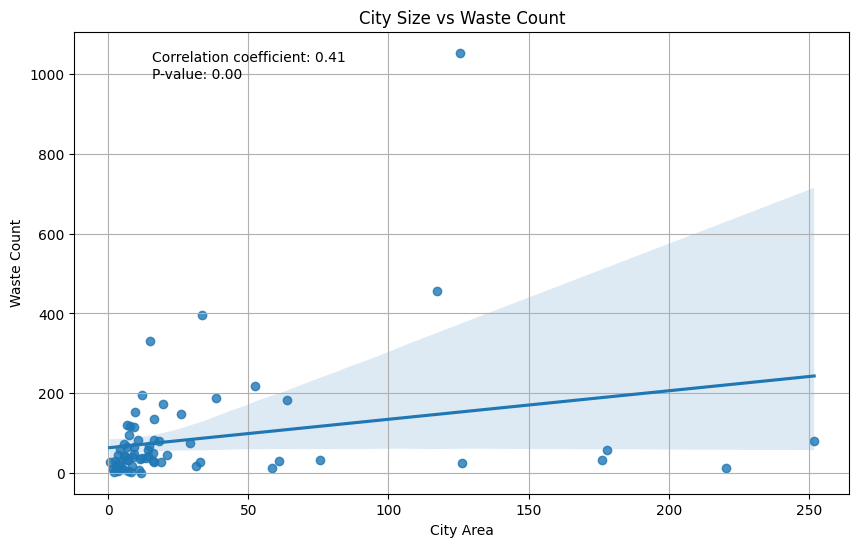

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

new_tmp = pd.DataFrame(df_only_neg)
new_tmp = new_tmp[new_tmp['יישוב'] != 'חבל אילות']

# Convert the size column to numeric without producing the warning
new_tmp.loc[:, 'שטח'] = pd.to_numeric(new_tmp['שטח'], errors='coerce')

# Group by city size and count the number of occurrences
city_size_counts = new_tmp['שטח'].value_counts().reset_index()
city_size_counts.columns = ['שטח', 'מספר התלונות']

# Calculate the Pearson correlation coefficient
#correlation = city_size_counts['שטח'].corr(city_size_counts['Count'])
correlation, p_value = spearmanr(city_size_counts['שטח'], city_size_counts['מספר התלונות'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

plt.figure(figsize=(10, 6))
sns.regplot(x='שטח', y='מספר התלונות', data=city_size_counts)
plt.title('City Size vs Waste Count')
plt.xlabel('City Area')
plt.ylabel('Waste Count')
plt.grid(True)
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation:.2f}\nP-value: {p_value:.2f}',
         transform=plt.gca().transAxes)
plt.show()

# **Bins**

Correlation coefficient: -0.913343367482011
P-value: 1.2944516794554623e-05


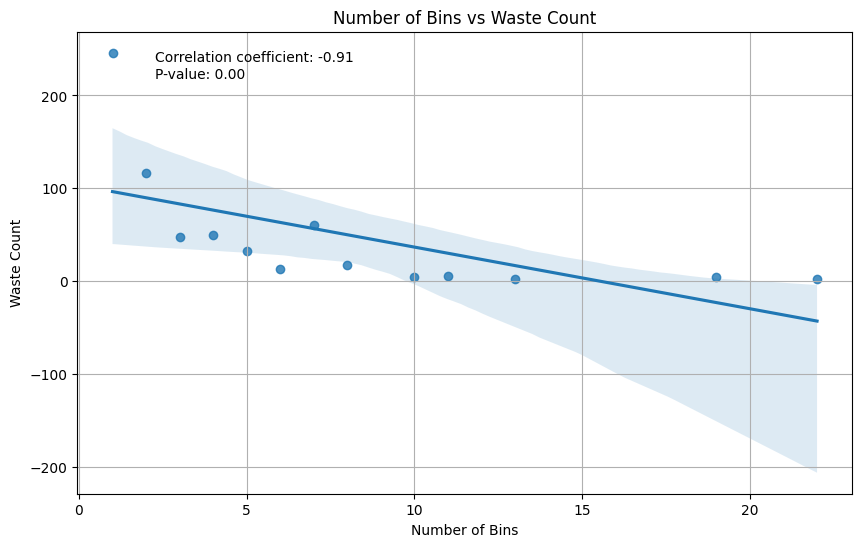

In [ ]:
new_tmp_2 = pd.DataFrame(df_only_neg)
new_tmp_2.dropna(subset=['מפלס הפסולת בפח במספר'], inplace=True)
new_tmp_2.dropna(subset=['כמה פחים יש בנקודת המדידה'], inplace=True)

# Convert the size column to numeric without producing the warning
new_tmp_2.loc[:, 'כמה פחים יש בנקודת המדידה'] = pd.to_numeric(new_tmp_2['כמה פחים יש בנקודת המדידה'], errors='coerce')

# Group by city size and count the number of occurrences
city_size_counts = new_tmp_2['כמה פחים יש בנקודת המדידה'].value_counts().reset_index()
city_size_counts.columns = ['כמה פחים יש בנקודת המדידה', 'מספר התלונות']

# Calculate the Pearson correlation coefficient
#correlation = city_size_counts['שטח'].corr(city_size_counts['Count'])
correlation, p_value = spearmanr(city_size_counts['כמה פחים יש בנקודת המדידה'], city_size_counts['מספר התלונות'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

plt.figure(figsize=(10, 6))
sns.regplot(x='כמה פחים יש בנקודת המדידה', y='מספר התלונות', data=city_size_counts)
plt.title('Number of Bins vs Waste Count')
plt.xlabel('Number of Bins')
plt.ylabel('Waste Count')
plt.grid(True)
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation:.2f}\nP-value: {p_value:.2f}',
         transform=plt.gca().transAxes)
plt.show()

Correlation coefficient: 0.7
P-value: 0.1881204043741873


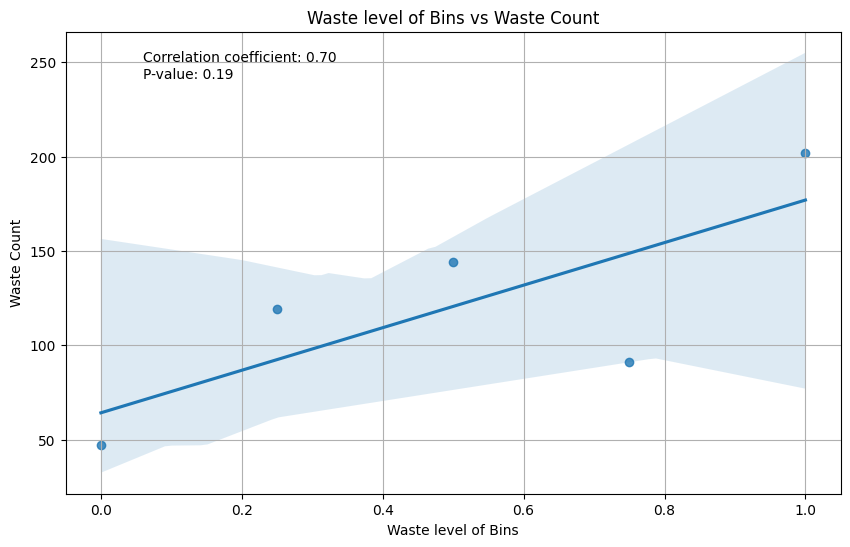

In [ ]:
# Convert the size column to numeric without producing the warning
new_tmp_2.loc[:, 'מפלס הפסולת בפח במספר'] = pd.to_numeric(new_tmp_2['מפלס הפסולת בפח במספר'], errors='coerce')

# Group by city size and count the number of occurrences
city_size_counts = new_tmp_2['מפלס הפסולת בפח במספר'].value_counts().reset_index()
city_size_counts.columns = ['מפלס הפסולת בפח במספר', 'מספר התלונות']

# Calculate the Pearson correlation coefficient
#correlation = city_size_counts['שטח'].corr(city_size_counts['Count'])
correlation, p_value = spearmanr(city_size_counts['מפלס הפסולת בפח במספר'], city_size_counts['מספר התלונות'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

plt.figure(figsize=(10, 6))
sns.regplot(x='מפלס הפסולת בפח במספר', y='מספר התלונות', data=city_size_counts)
plt.title('Waste level of Bins vs Waste Count')
plt.xlabel('Waste level of Bins')
plt.ylabel('Waste Count')
plt.grid(True)
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation:.2f}\nP-value: {p_value:.2f}',
         transform=plt.gca().transAxes)
plt.show()

# **Changing DF for the model**

In [ ]:
# Combine date, time, and address into a single ID column
df_only_neg['זמן_סיום_מהמערכת'] = df_only_neg['זמן_סיום_מהמערכת'].astype(str)
df_only_neg['time'] = df_only_neg['time'].astype(str)
df_only_neg['נ.צ כתובת'] = df_only_neg['נ.צ כתובת'].astype(str)
df_only_neg['סמל_יישוב'] = df_only_neg['סמל_יישוב'].astype(str)

df_only_neg['id'] = 'Date: ' + df_only_neg['זמן_סיום_מהמערכת'] + ' Time: ' + df_only_neg['time'] + ' Coordinates: ' + df_only_neg['נ.צ כתובת'] + ' City code: ' + df_only_neg['סמל_יישוב'] + ' Street: ' + df_only_neg['כתובת_תיאור_מיקום_נקודת_המדידה']

# Group by the ID and aggregate the counts
model_df = df_only_neg.groupby('id').agg({
    'זמן_סיום_מהמערכת': 'first',
    'time': 'first',
    'נ.צ כתובת': 'first',
    'סכום  אוכלוסייה בסוף השנה': 'first',
    'שטח': 'first',
    'דירוג חברתי-כלכלי ': 'first',
    'מדד סוציואקונומי': 'first',
    'כתובת_תיאור_מיקום_נקודת_המדידה': 'first',
    'מדרכה': 'first', 'אבנישפה': 'first', 'גדרות': 'first', 'צמחייה': 'first',
    'מצב הפח': 'first',
    'אריזות קרטון': 'first', 'כתמי מסטיק': 'first', 'צואת כלבים': 'first', 'פסולת אורגנית': 'first', 'פלסטיק אחר שקיות פלסטיק ורכיבי פלסטיק שאינם מכלי משקה אריזות מזון ומשקאות': 'first', 'זכוכית לא מכלי משקה או לא ניתן לזיהוי': 'first', 'אריזות של חטיפים': 'first', 'כוסות שתייה חמה חדפ': 'first', 'כוסות שתייה קרה חדפ': 'first', 'סכום חדפ': 'first', 'צלחות חדפ': 'first', 'אריזות מזון Take Away נייר': 'first', 'פקקים של מכלי משקה': 'first', 'מכלי משקה למיניהם': 'first', 'קופסאות סיגריות': 'first', 'מסכות כירורגיות': 'first', 'בדלי סיגריות': 'first',
    'כמה פחים יש בנקודת המדידה': 'first',
    'מפלס הפסולת בפח במספר': 'first',
    'חודש': 'first',
    'אזור תעשייה': 'first', 'חוף ים': 'first', 'מבנה ציבור': 'first', 'מרכז מסחרי': 'first', 'פנאי ונופש': 'first', 'רחוב מגורים': 'first', 'רחוב מסחרי': 'first',
    'ראשון': 'first', 'שני': 'first', 'שלישי': 'first', 'רביעי': 'first', 'חמישי': 'first', 'שישי': 'first', 'שבת': 'first',
    'פריט אחר': 'sum', 'כוס': 'sum', 'שקיות': 'sum', 'אריזות': 'sum', 'סיגריות': 'sum', 'בקבוקים': 'sum', 'צרכים בע"ח': 'sum', 'פלסטיק': 'sum', 'מסיכות': 'sum', 'פחיות': 'sum', 'נייר': 'sum', 'עטיפות': 'sum',
    'רכב': 'sum', 'הולך רגל': 'sum',
    'תיאור_חיובי_שלילי': 'count'  # Count the number of reports
}).rename(columns={'תיאור_חיובי_שלילי': 'num_of_reports'}).reset_index()

# **Changing Time and Month to dummy vars**

In [ ]:
#Change time and month columns dummy vars
model_df = model_df.join(pd.get_dummies(model_df['חודש'], dtype=int, prefix='month'))
model_df = model_df.join(pd.get_dummies(model_df['time'], dtype=int,prefix='time'))

#Drop the original columns
model_df = model_df.drop(['חודש', 'time'], axis=1)

# **Min-Max Scaling**

In [ ]:
#שטח
model_df['שטח'] = pd.to_numeric(model_df['שטח'], errors='coerce')
model_df['שטח'] = (model_df['שטח'] - model_df['שטח'].min()) / (model_df['שטח'].max() - model_df['שטח'].min())

#דירוג חברתי כלכלי
model_df['דירוג חברתי-כלכלי '] = pd.to_numeric(model_df['דירוג חברתי-כלכלי '], errors='coerce')
model_df['דירוג חברתי-כלכלי '] = (model_df['דירוג חברתי-כלכלי '] - model_df['דירוג חברתי-כלכלי '].min()) / (model_df['דירוג חברתי-כלכלי '].max() - model_df['דירוג חברתי-כלכלי '].min())

#סכום אוכלוסיה
model_df['סכום  אוכלוסייה בסוף השנה'] = pd.to_numeric(model_df['סכום  אוכלוסייה בסוף השנה'], errors='coerce')
model_df['סכום  אוכלוסייה בסוף השנה'] = (model_df['סכום  אוכלוסייה בסוף השנה'] - model_df['סכום  אוכלוסייה בסוף השנה'].min()) / (model_df['סכום  אוכלוסייה בסוף השנה'].max() - model_df['סכום  אוכלוסייה בסוף השנה'].min())

#אריזות קרטון
model_df['אריזות קרטון'] = pd.to_numeric(model_df['אריזות קרטון'], errors='coerce')
model_df['אריזות קרטון'] = (model_df['אריזות קרטון'] - model_df['אריזות קרטון'].min()) / (model_df['אריזות קרטון'].max() - model_df['אריזות קרטון'].min())

#כתמי מסטיק
model_df['כתמי מסטיק'] = pd.to_numeric(model_df['כתמי מסטיק'], errors='coerce')
model_df['כתמי מסטיק'] = (model_df['כתמי מסטיק'] - model_df['כתמי מסטיק'].min()) / (model_df['כתמי מסטיק'].max() - model_df['כתמי מסטיק'].min())

#צואת כלבים
model_df['צואת כלבים'] = pd.to_numeric(model_df['צואת כלבים'], errors='coerce')
model_df['צואת כלבים'] = (model_df['צואת כלבים'] - model_df['צואת כלבים'].min()) / (model_df['צואת כלבים'].max() - model_df['צואת כלבים'].min())

#פסולת אורגנית
model_df['פסולת אורגנית'] = pd.to_numeric(model_df['פסולת אורגנית'], errors='coerce')
model_df['פסולת אורגנית'] = (model_df['פסולת אורגנית'] - model_df['פסולת אורגנית'].min()) / (model_df['פסולת אורגנית'].max() - model_df['פסולת אורגנית'].min())

#פלסטיק אחר שקיות פלסטיק ורכיבי פלסטיק שאינם מכלי משקה אריזות מזון ומשקאות
model_df['פלסטיק אחר שקיות פלסטיק ורכיבי פלסטיק שאינם מכלי משקה אריזות מזון ומשקאות'] = pd.to_numeric(model_df['פלסטיק אחר שקיות פלסטיק ורכיבי פלסטיק שאינם מכלי משקה אריזות מזון ומשקאות'], errors='coerce')
model_df['פלסטיק אחר שקיות פלסטיק ורכיבי פלסטיק שאינם מכלי משקה אריזות מזון ומשקאות'] = (model_df['פלסטיק אחר שקיות פלסטיק ורכיבי פלסטיק שאינם מכלי משקה אריזות מזון ומשקאות'] - model_df['פלסטיק אחר שקיות פלסטיק ורכיבי פלסטיק שאינם מכלי משקה אריזות מזון ומשקאות'].min()) / (model_df['פלסטיק אחר שקיות פלסטיק ורכיבי פלסטיק שאינם מכלי משקה אריזות מזון ומשקאות'].max() - model_df['פלסטיק אחר שקיות פלסטיק ורכיבי פלסטיק שאינם מכלי משקה אריזות מזון ומשקאות'].min())

#זכוכית לא מכלי משקה או לא ניתן לזיהוי
model_df['זכוכית לא מכלי משקה או לא ניתן לזיהוי'] = pd.to_numeric(model_df['זכוכית לא מכלי משקה או לא ניתן לזיהוי'], errors='coerce')
model_df['זכוכית לא מכלי משקה או לא ניתן לזיהוי'] = (model_df['זכוכית לא מכלי משקה או לא ניתן לזיהוי'] - model_df['זכוכית לא מכלי משקה או לא ניתן לזיהוי'].min()) / (model_df['זכוכית לא מכלי משקה או לא ניתן לזיהוי'].max() - model_df['זכוכית לא מכלי משקה או לא ניתן לזיהוי'].min())

#אריזות של חטיפים
model_df['אריזות של חטיפים'] = pd.to_numeric(model_df['אריזות של חטיפים'], errors='coerce')
model_df['אריזות של חטיפים'] = (model_df['אריזות של חטיפים'] - model_df['אריזות של חטיפים'].min()) / (model_df['אריזות של חטיפים'].max() - model_df['אריזות של חטיפים'].min())

#כוסות שתייה חמה חדפ
model_df['כוסות שתייה חמה חדפ'] = pd.to_numeric(model_df['כוסות שתייה חמה חדפ'], errors='coerce')
model_df['כוסות שתייה חמה חדפ'] = (model_df['כוסות שתייה חמה חדפ'] - model_df['כוסות שתייה חמה חדפ'].min()) / (model_df['כוסות שתייה חמה חדפ'].max() - model_df['כוסות שתייה חמה חדפ'].min())

#כוסות שתייה קרה חדפ
model_df['כוסות שתייה קרה חדפ'] = pd.to_numeric(model_df['כוסות שתייה קרה חדפ'], errors='coerce')
model_df['כוסות שתייה קרה חדפ'] = (model_df['כוסות שתייה קרה חדפ'] - model_df['כוסות שתייה קרה חדפ'].min()) / (model_df['כוסות שתייה קרה חדפ'].max() - model_df['כוסות שתייה קרה חדפ'].min())

#סכום חדפ
model_df['סכום חדפ'] = pd.to_numeric(model_df['סכום חדפ'], errors='coerce')
model_df['סכום חדפ'] = (model_df['סכום חדפ'] - model_df['סכום חדפ'].min()) / (model_df['סכום חדפ'].max() - model_df['סכום חדפ'].min())

#צלחות חדפ
model_df['צלחות חדפ'] = pd.to_numeric(model_df['צלחות חדפ'], errors='coerce')
model_df['צלחות חדפ'] = (model_df['צלחות חדפ'] - model_df['צלחות חדפ'].min()) / (model_df['צלחות חדפ'].max() - model_df['צלחות חדפ'].min())

#אריזות מזון Take Away נייר
model_df['אריזות מזון Take Away נייר'] = pd.to_numeric(model_df['אריזות מזון Take Away נייר'], errors='coerce')
model_df['אריזות מזון Take Away נייר'] = (model_df['אריזות מזון Take Away נייר'] - model_df['אריזות מזון Take Away נייר'].min()) / (model_df['אריזות מזון Take Away נייר'].max() - model_df['אריזות מזון Take Away נייר'].min())

#פקקים של מכלי משקה
model_df['פקקים של מכלי משקה'] = pd.to_numeric(model_df['פקקים של מכלי משקה'], errors='coerce')
model_df['פקקים של מכלי משקה'] = (model_df['פקקים של מכלי משקה'] - model_df['פקקים של מכלי משקה'].min()) / (model_df['פקקים של מכלי משקה'].max() - model_df['פקקים של מכלי משקה'].min())

#מכלי משקה למיניהם
model_df['מכלי משקה למיניהם'] = pd.to_numeric(model_df['מכלי משקה למיניהם'], errors='coerce')
model_df['מכלי משקה למיניהם'] = (model_df['מכלי משקה למיניהם'] - model_df['מכלי משקה למיניהם'].min()) / (model_df['מכלי משקה למיניהם'].max() - model_df['מכלי משקה למיניהם'].min())

#קופסאות סיגריות
model_df['קופסאות סיגריות'] = pd.to_numeric(model_df['קופסאות סיגריות'], errors='coerce')
model_df['קופסאות סיגריות'] = (model_df['קופסאות סיגריות'] - model_df['קופסאות סיגריות'].min()) / (model_df['קופסאות סיגריות'].max() - model_df['קופסאות סיגריות'].min())

#מסכות כירורגיות
model_df['מסכות כירורגיות'] = pd.to_numeric(model_df['מסכות כירורגיות'], errors='coerce')
model_df['מסכות כירורגיות'] = (model_df['מסכות כירורגיות'] - model_df['מסכות כירורגיות'].min()) / (model_df['מסכות כירורגיות'].max() - model_df['מסכות כירורגיות'].min())

#בדלי סיגריות
model_df['בדלי סיגריות'] = pd.to_numeric(model_df['בדלי סיגריות'], errors='coerce')
model_df['בדלי סיגריות'] = (model_df['בדלי סיגריות'] - model_df['בדלי סיגריות'].min()) / (model_df['בדלי סיגריות'].max() - model_df['בדלי סיגריות'].min())

#כמה פחים יש בנקודת המדידה
model_df['כמה פחים יש בנקודת המדידה'] = pd.to_numeric(model_df['כמה פחים יש בנקודת המדידה'], errors='coerce')
model_df['כמה פחים יש בנקודת המדידה'] = (model_df['כמה פחים יש בנקודת המדידה'] - model_df['כמה פחים יש בנקודת המדידה'].min()) / (model_df['כמה פחים יש בנקודת המדידה'].max() - model_df['כמה פחים יש בנקודת המדידה'].min())

model_df.to_excel('model_df.xlsx', index=False)
print("model_df has been created.")

model_df has been created.


# **No nan rows / No nan columns DFs for the model**

In [ ]:
# Split נ.צ כתובת into latitude and longitude
model_df[['latitude', 'longitude']] = model_df['נ.צ כתובת'].str.split(',', expand=True).astype(float)
model_df = model_df.drop(columns=['נ.צ כתובת'])

# Remove columns with any NaN values
model_df_noNanColumns = model_df.dropna(axis=1)

# Remove rows with any NaN values
model_df_noNanRows = model_df.dropna(axis=0)

model_df_noNanColumns.to_excel('model_df_noNanColumns.xlsx', index=False)
model_df_noNanRows.to_excel('model_df_noNanRows.xlsx', index=False)

# **No NAN Columns - LinearRegression / Random Forest / XGBoost models (num_of_reports)**

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn.preprocessing import StandardScaler

In [ ]:
#TARGET = num_of_reports

# Define features and target
X = model_df_noNanColumns.drop(columns=['num_of_reports', 'id', 'מדד סוציואקונומי', 'כתובת_תיאור_מיקום_נקודת_המדידה', 'זמן_סיום_מהמערכת', 'פריט אחר', 'כוס', 'שקיות', 'אריזות', 'סיגריות', 'בקבוקים', 'צרכים בע"ח', 'פלסטיק', 'מסיכות', 'פחיות', 'נייר', 'עטיפות', 'רכב', 'הולך רגל'])
y = model_df_noNanColumns['num_of_reports']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_train_pred_lin = lin_reg.predict(X_train)
y_test_pred_lin = lin_reg.predict(X_test)

# Calculate metrics for Linear Regression
r2_train_lin = r2_score(y_train, y_train_pred_lin)
r2_test_lin = r2_score(y_test, y_test_pred_lin)
rmse_train_lin = np.sqrt(mean_squared_error(y_train, y_train_pred_lin))
rmse_test_lin = np.sqrt(mean_squared_error(y_test, y_test_pred_lin))
std_dev_lin = np.std(y_test_pred_lin)

print(f'NO NAN COLUMNS\nTARGET = NUM_OF_REPORTS\n')
print(f'Linear Regression R² (Train): {r2_train_lin}')
print(f'Linear Regression R² (Test): {r2_test_lin}')
print(f'Linear Regression RMSE (Train): {rmse_train_lin}')
print(f'Linear Regression RMSE (Test): {rmse_test_lin}')
print(f'Linear Regression Std Dev (Test Predictions): {std_dev_lin}\n')

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_train_pred_rf = rf_reg.predict(X_train)
y_test_pred_rf = rf_reg.predict(X_test)

# Calculate metrics for Random Forest Regression
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
std_dev_rf = np.std(y_test_pred_rf)

print(f'Random Forest Regression R² (Train): {r2_train_rf}')
print(f'Random Forest Regression R² (Test): {r2_test_rf}')
print(f'Random Forest Regression RMSE (Train): {rmse_train_rf}')
print(f'Random Forest Regression RMSE (Test): {rmse_test_rf}')
print(f'Random Forest Regression Std Dev (Test Predictions): {std_dev_rf}\n')

# XGBoost Regression
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)
y_train_pred_xgb = xgb_reg.predict(X_train)
y_test_pred_xgb = xgb_reg.predict(X_test)

# Calculate metrics for XGBoost Regression
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
std_dev_xgb = np.std(y_test_pred_xgb)

print(f'XGBoost Regression R² (Train): {r2_train_xgb}')
print(f'XGBoost Regression R² (Test): {r2_test_xgb}')
print(f'XGBoost Regression RMSE (Train): {rmse_train_xgb}')
print(f'XGBoost Regression RMSE (Test): {rmse_test_xgb}')
print(f'XGBoost Regression Std Dev (Test Predictions): {std_dev_xgb}')

X.to_excel('model_df_noNanColumns_afterDrop.xlsx', index=False)

NO NAN COLUMNS
TARGET = NUM_OF_REPORTS

Linear Regression R² (Train): 0.11738813300825546
Linear Regression R² (Test): 0.046059036829639965
Linear Regression RMSE (Train): 2.385816341521922
Linear Regression RMSE (Test): 2.5349280524926407
Linear Regression Std Dev (Test Predictions): 0.827578594666032

Random Forest Regression R² (Train): 0.8277799212255208
Random Forest Regression R² (Test): 0.19986329616630416
Random Forest Regression RMSE (Train): 1.0538869323494873
Random Forest Regression RMSE (Test): 2.321597806626867
Random Forest Regression Std Dev (Test Predictions): 1.5954862927155236

XGBoost Regression R² (Train): 0.8434845455722013
XGBoost Regression R² (Test): 0.12140712115427965
XGBoost Regression RMSE (Train): 1.0046869032702719
XGBoost Regression RMSE (Test): 2.4327569830373874
XGBoost Regression Std Dev (Test Predictions): 1.8272895812988281


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearch
param_grid = {
    'n_estimators': [100, 200, 300, 500],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],               # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],               # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                 # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],      # Number of features to consider when looking for the best split
    'bootstrap': [True, False]                     # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation R² Score: {best_score}")

# Use the best model to predict
best_rf_model = grid_search.best_estimator_

# Predictions
y_train_pred_best_rf = best_rf_model.predict(X_train)
y_test_pred_best_rf = best_rf_model.predict(X_test)

# Calculate the metrics for the best Random Forest model (Train)
r2_train_best_rf = r2_score(y_train, y_train_pred_best_rf)
rmse_train_best_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_best_rf))

# Calculate the metrics for the best Random Forest model (Test)
r2_test_best_rf = r2_score(y_test, y_test_pred_best_rf)
rmse_test_best_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_best_rf))
std_dev_best_rf = np.std(y_test_pred_best_rf)

# Output the results
print(f"Random Forest Regression R² (Train): {r2_train_best_rf}")
print(f"Random Forest Regression RMSE (Train): {rmse_train_best_rf}")
print(f"Random Forest Regression R² (Test): {r2_test_best_rf}")
print(f"Random Forest Regression RMSE (Test): {rmse_test_best_rf}")
print(f"Random Forest Regression Std Dev (Test Predictions): {std_dev_best_rf}")

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1440 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.p

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}
Best Cross-Validation R² Score: 0.20427403233293706
Random Forest Regression R² (Train): 0.42730368110475236
Random Forest Regression RMSE (Train): 1.921827146058165
Random Forest Regression R² (Test): 0.22039035774115812
Random Forest Regression RMSE (Test): 2.291624672142896
Random Forest Regression Std Dev (Test Predictions): 1.0399949299056475


In [ ]:
# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=500, random_state=42, bootstrap=False, max_depth=20, max_features='sqrt', min_samples_leaf=4, min_samples_split=10)
rf_reg.fit(X_train, y_train)
y_train_pred_rf = rf_reg.predict(X_train)
y_test_pred_rf = rf_reg.predict(X_test)

# Calculate metrics for Random Forest Regression
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
std_dev_rf = np.std(y_test_pred_rf)

print(f'Random Forest Regression R² (Train): {r2_train_rf}')
print(f'Random Forest Regression R² (Test): {r2_test_rf}')
print(f'Random Forest Regression RMSE (Train): {rmse_train_rf}')
print(f'Random Forest Regression RMSE (Test): {rmse_test_rf}')
print(f'Random Forest Regression Std Dev (Test Predictions): {std_dev_rf}\n')

Random Forest Regression R² (Train): 0.42730368110475236
Random Forest Regression R² (Test): 0.22039035774115812
Random Forest Regression RMSE (Train): 1.921827146058165
Random Forest Regression RMSE (Test): 2.291624672142896
Random Forest Regression Std Dev (Test Predictions): 1.0399949299056475



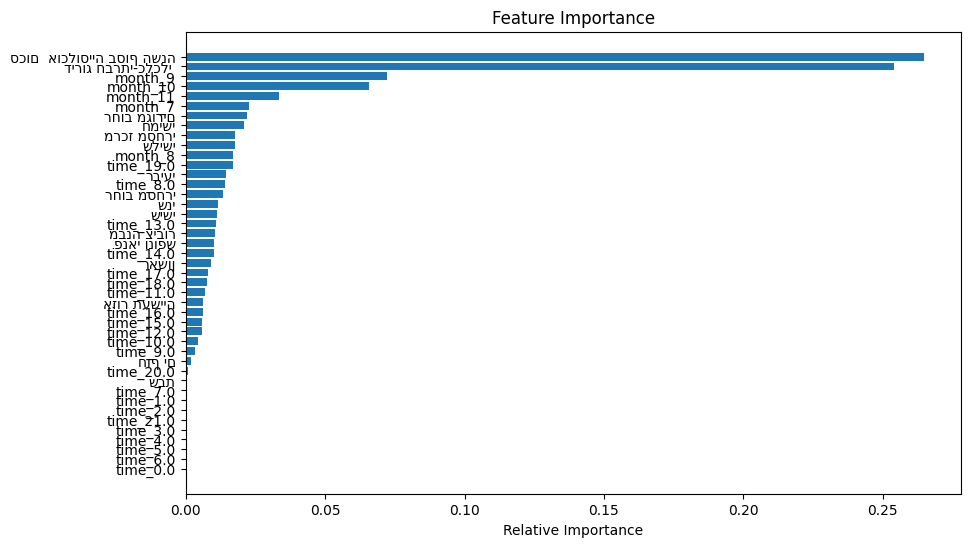

In [ ]:
feature_importances = rf_reg.feature_importances_
feature_names = X.columns

import matplotlib.pyplot as plt
import numpy as np

# Sort the features by importance
indices = np.argsort(feature_importances)

# Create the plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), feature_importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# **No NAN Rows - LinearRegression / Random Forest / XGBoost models (num_of_reports)**

In [ ]:
#TARGET = num_of_reports

# Define features and target
X = model_df_noNanRows.drop(columns=['num_of_reports', 'id', 'כתובת_תיאור_מיקום_נקודת_המדידה', 'זמן_סיום_מהמערכת', 'מדד סוציואקונומי', 'פריט אחר', 'כוס', 'שקיות', 'אריזות', 'סיגריות', 'בקבוקים', 'צרכים בע"ח', 'פלסטיק', 'מסיכות', 'פחיות', 'נייר', 'עטיפות', 'רכב', 'הולך רגל'])
y = model_df_noNanRows['num_of_reports']

# Convert date to numeric
#X['זמן_סיום_מהמערכת'] = pd.to_datetime(X['זמן_סיום_מהמערכת'], format = '%d-%m-%Y')
#X['זמן_סיום_מהמערכת'] = X['זמן_סיום_מהמערכת'].map(dt.datetime.toordinal)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_train_pred_lin = lin_reg.predict(X_train)
y_test_pred_lin = lin_reg.predict(X_test)

# Calculate metrics for Linear Regression
r2_train_lin = r2_score(y_train, y_train_pred_lin)
r2_test_lin = r2_score(y_test, y_test_pred_lin)
rmse_train_lin = np.sqrt(mean_squared_error(y_train, y_train_pred_lin))
rmse_test_lin = np.sqrt(mean_squared_error(y_test, y_test_pred_lin))
std_dev_lin = np.std(y_test_pred_lin)

print(f'NO NAN ROWS\nTARGET = NUM_OF_REPORTS\n')
print(f'Linear Regression R² (Train): {r2_train_lin}')
print(f'Linear Regression R² (Test): {r2_test_lin}')
print(f'Linear Regression RMSE (Train): {rmse_train_lin}')
print(f'Linear Regression RMSE (Test): {rmse_test_lin}')
print(f'Linear Regression Std Dev (Test Predictions): {std_dev_lin}\n')

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_train_pred_rf = rf_reg.predict(X_train)
y_test_pred_rf = rf_reg.predict(X_test)

# Calculate metrics for Random Forest Regression
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
std_dev_rf = np.std(y_test_pred_rf)

print(f'Random Forest Regression R² (Train): {r2_train_rf}')
print(f'Random Forest Regression R² (Test): {r2_test_rf}')
print(f'Random Forest Regression RMSE (Train): {rmse_train_rf}')
print(f'Random Forest Regression RMSE (Test): {rmse_test_rf}')
print(f'Random Forest Regression Std Dev (Test Predictions): {std_dev_rf}\n')

# XGBoost Regression
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)
y_train_pred_xgb = xgb_reg.predict(X_train)
y_test_pred_xgb = xgb_reg.predict(X_test)

# Calculate metrics for XGBoost Regression
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
std_dev_xgb = np.std(y_test_pred_xgb)

print(f'XGBoost Regression R² (Train): {r2_train_xgb}')
print(f'XGBoost Regression R² (Test): {r2_test_xgb}')
print(f'XGBoost Regression RMSE (Train): {rmse_train_xgb}')
print(f'XGBoost Regression RMSE (Test): {rmse_test_xgb}')
print(f'XGBoost Regression Std Dev (Test Predictions): {std_dev_xgb}')

X.to_excel('model_df_noNanRows_afterDrop.xlsx', index=False)

NO NAN ROWS
TARGET = NUM_OF_REPORTS

Linear Regression R² (Train): 0.4641109957230751
Linear Regression R² (Test): -0.9905809884509247
Linear Regression RMSE (Train): 2.2558188879024503
Linear Regression RMSE (Test): 3.5730201042194554
Linear Regression Std Dev (Test Predictions): 3.301633493342157

Random Forest Regression R² (Train): 0.8263470407610741
Random Forest Regression R² (Test): 0.03804786980353092
Random Forest Regression RMSE (Train): 1.2841267706413053
Random Forest Regression RMSE (Test): 2.4838322647865323
Random Forest Regression Std Dev (Test Predictions): 1.270191215403498

XGBoost Regression R² (Train): 0.9996910471729165
XGBoost Regression R² (Test): -0.6835515067942581
XGBoost Regression RMSE (Train): 0.05416426977062537
XGBoost Regression RMSE (Test): 3.2859332559846184
XGBoost Regression Std Dev (Test Predictions): 2.3941376209259033


# **Turning the data for Classification**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming `model_df_noNanColumns` is your initial DataFrame
model_df_noNanColumns_Classes = model_df_noNanColumns

# Calculate the 33rd and 66th percentiles
lower_threshold = model_df_noNanColumns_Classes['num_of_reports'].quantile(0.3)
upper_threshold = model_df_noNanColumns_Classes['num_of_reports'].quantile(0.66)

# Create the classes
model_df_noNanColumns_Classes['target'] = pd.cut(model_df_noNanColumns_Classes['num_of_reports'],
                            bins=[-np.inf, lower_threshold, upper_threshold, np.inf],
                            labels=['Low', 'Medium', 'High'])

# Summarize class distribution
class_summary = model_df_noNanColumns_Classes['target'].value_counts()
class_summary_pct = model_df_noNanColumns_Classes['target'].value_counts(normalize=True)

summary = pd.concat([class_summary, class_summary_pct], axis=1, keys=['Count', 'Percentage'])
print(summary)


        Count  Percentage
target                   
Low       945    0.423197
Medium    763    0.341693
High      525    0.235110


<ipython-input-27-4170b45d0ade>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df_noNanColumns_Classes['target'] = pd.cut(model_df_noNanColumns_Classes['num_of_reports'],


In [ ]:
model_df_noNanColumns_Classes.to_excel('model_df_noNanColumns_Classes.xlsx', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = 'model_df_noNanColumns_Classes.xlsx'
df = pd.read_excel(file_path)

# Encode the target variable
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

# Drop the specified columns
X = df.drop(columns=[
    'target', 'num_of_reports', 'id', 'מדד סוציואקונומי', 'כתובת_תיאור_מיקום_נקודת_המדידה',
    'זמן_סיום_מהמערכת', 'פריט אחר', 'כוס', 'שקיות', 'אריזות', 'סיגריות', 'בקבוקים',
    'צרכים בע"ח', 'פלסטיק', 'מסיכות', 'פחיות', 'נייר', 'עטיפות', 'רכב', 'הולך רגל',
    ])
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Initialize the model with the best parameters
gb = GradientBoostingClassifier(random_state=42)

# Train the model on the entire training set
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(accuracy)
print(report)

0.49402985074626865
              precision    recall  f1-score   support

        High       0.49      0.30      0.37       156
         Low       0.52      0.71      0.60       272
      Medium       0.45      0.38      0.41       242

    accuracy                           0.49       670
   macro avg       0.49      0.46      0.46       670
weighted avg       0.49      0.49      0.48       670



In [ ]:
# Running the training and evaluation process multiple times with correct initialization

results = []

for i in range(5):  # Run the process 5 times
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*42)

    # Initialize the model with the best parameters
    gb = GradientBoostingClassifier(random_state=42)

    # Train the model on the entire training set
    gb.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = gb.predict(X_test)

    # Evaluate the model
    print(f"Iteration: {i+1}")
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    print(report)

    results.append({
        "Iteration": i + 1,
        "Accuracy": accuracy,
        "Classification Report": report
    })


Iteration: 1
0.5302013422818792
              precision    recall  f1-score   support

        High       0.49      0.46      0.48        99
         Low       0.54      0.70      0.61       182
      Medium       0.54      0.39      0.45       166

    accuracy                           0.53       447
   macro avg       0.52      0.52      0.51       447
weighted avg       0.53      0.53      0.52       447

Iteration: 2
0.5167785234899329
              precision    recall  f1-score   support

        High       0.52      0.31      0.39       107
         Low       0.51      0.78      0.62       168
      Medium       0.52      0.39      0.45       172

    accuracy                           0.52       447
   macro avg       0.52      0.49      0.48       447
weighted avg       0.52      0.52      0.50       447

Iteration: 3
0.48322147651006714
              precision    recall  f1-score   support

        High       0.53      0.31      0.39       121
         Low       0.53      0.6

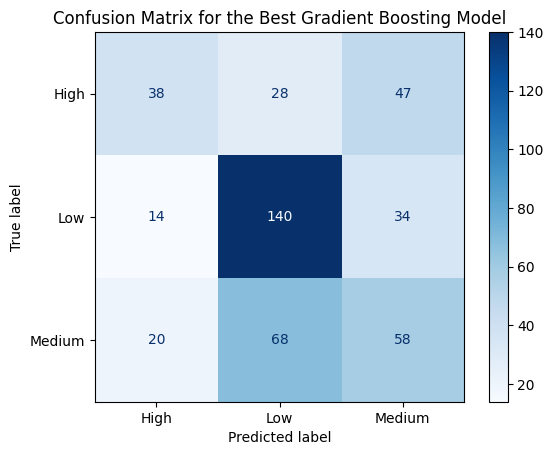

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test, display_labels=label_encoder.classes_, cmap=plt.cm.Blues)
plt.title("Confusion Matrix for the Best Gradient Boosting Model")
plt.show()